In [7]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CRS_NYC = 'EPSG:2263'
CRS_LATLON = 'EPSG:4326'
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/citibike/exports'

## Select Bike Routes Within Citi Bike Service Area

<AxesSubplot:>

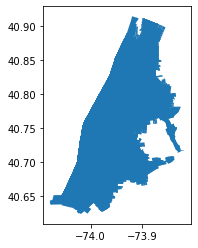

In [3]:
# Census tracts which are 2nd-order neighbors served by Citi Bike.
cb_area_gdf = gpd.read_file(f'{DATA_DIR}/geo/nyc_citibike.shp', crs=CRS_NYC)
cb_area_gdf = cb_area_gdf.to_crs(CRS_LATLON)
cb_area_gdf.plot()

<AxesSubplot:>

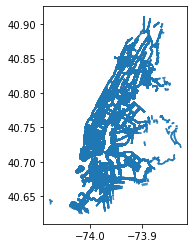

In [4]:
# All bike lanes/routes as of 2021.
lanes_gdf = gpd.read_file(f'{DATA_DIR}/geo/Routes_Merged_Simple.shp')
lanes_gdf = gpd.sjoin(lanes_gdf, cb_area_gdf, how='inner', op='intersects')
lanes_gdf.plot()

In [11]:
DATE_STRING = '202101'

In [14]:
lanes_gdf.set_crs(CRS_LATLON)
lanes_gdf.to_file(f'{DATA_DIR}/geo/lanes/' +
                  f'{DATE_STRING}_lanes_citibike_area.shp')